# Regresja

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn import  metrics
from statsmodels.formula.api import ols

Rozważmy zbiór Boston

In [2]:
boston = datasets.load_boston()
# print description
# print(boston.DESCR)

In [3]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
# get the data
boston_X = boston.data
boston_Y = boston.target

# Split the data into training/testing sets
boston_X_train = boston_X[:-50]
boston_X_test = boston_X[-50:]
 
# Split the targets into training/testing sets
boston_y_train = boston_Y[:-50]
boston_y_test = boston_Y[-50:]

In [5]:
bos=pd.DataFrame(boston.data[:-50])
bos.columns = boston.feature_names
bos['PRICE']=boston.target[:-50]
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
bos1=pd.DataFrame(boston_X[-50:])
bos1.columns = boston.feature_names
bos1['PRICE']=boston.target[-50:]
bos1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,4.66883,0.0,18.1,0.0,0.713,5.976,87.9,2.5806,24.0,666.0,20.2,10.48,19.01,12.7
1,8.20058,0.0,18.1,0.0,0.713,5.936,80.3,2.7792,24.0,666.0,20.2,3.50,16.94,13.5
2,7.75223,0.0,18.1,0.0,0.713,6.301,83.7,2.7831,24.0,666.0,20.2,272.21,16.23,14.9
3,6.80117,0.0,18.1,0.0,0.713,6.081,84.4,2.7175,24.0,666.0,20.2,396.90,14.70,20.0
4,4.81213,0.0,18.1,0.0,0.713,6.701,90.0,2.5975,24.0,666.0,20.2,255.23,16.42,16.4


In [63]:
model = ols("PRICE ~ I(np.log(RM)**2)*I(np.log(DIS))*I(-np.log(LSTAT))*I(-AGE**2)*I()", bos).fit()
# Print the summary
print((model.summary2()))

                                          Results: Ordinary least squares
Model:                                OLS                              Adj. R-squared:                     0.831    
Dependent Variable:                   PRICE                            AIC:                                2551.3346
Date:                                 2022-03-31 11:49                 BIC:                                2617.2945
No. Observations:                     456                              Log-Likelihood:                     -1259.7  
Df Model:                             15                               F-statistic:                        150.3    
Df Residuals:                         440                              Prob (F-statistic):                 2.38e-162
R-squared:                            0.837                            Scale:                              15.221   
-----------------------------------------------------------------------------------------------------------

In [66]:
from sklearn import  metrics
metrics.r2_score(bos.PRICE, model.predict(bos))

0.8366658907095633

In [67]:
from sklearn import  metrics
metrics.r2_score(bos1.PRICE, model.predict(bos1))

0.33657198805034405

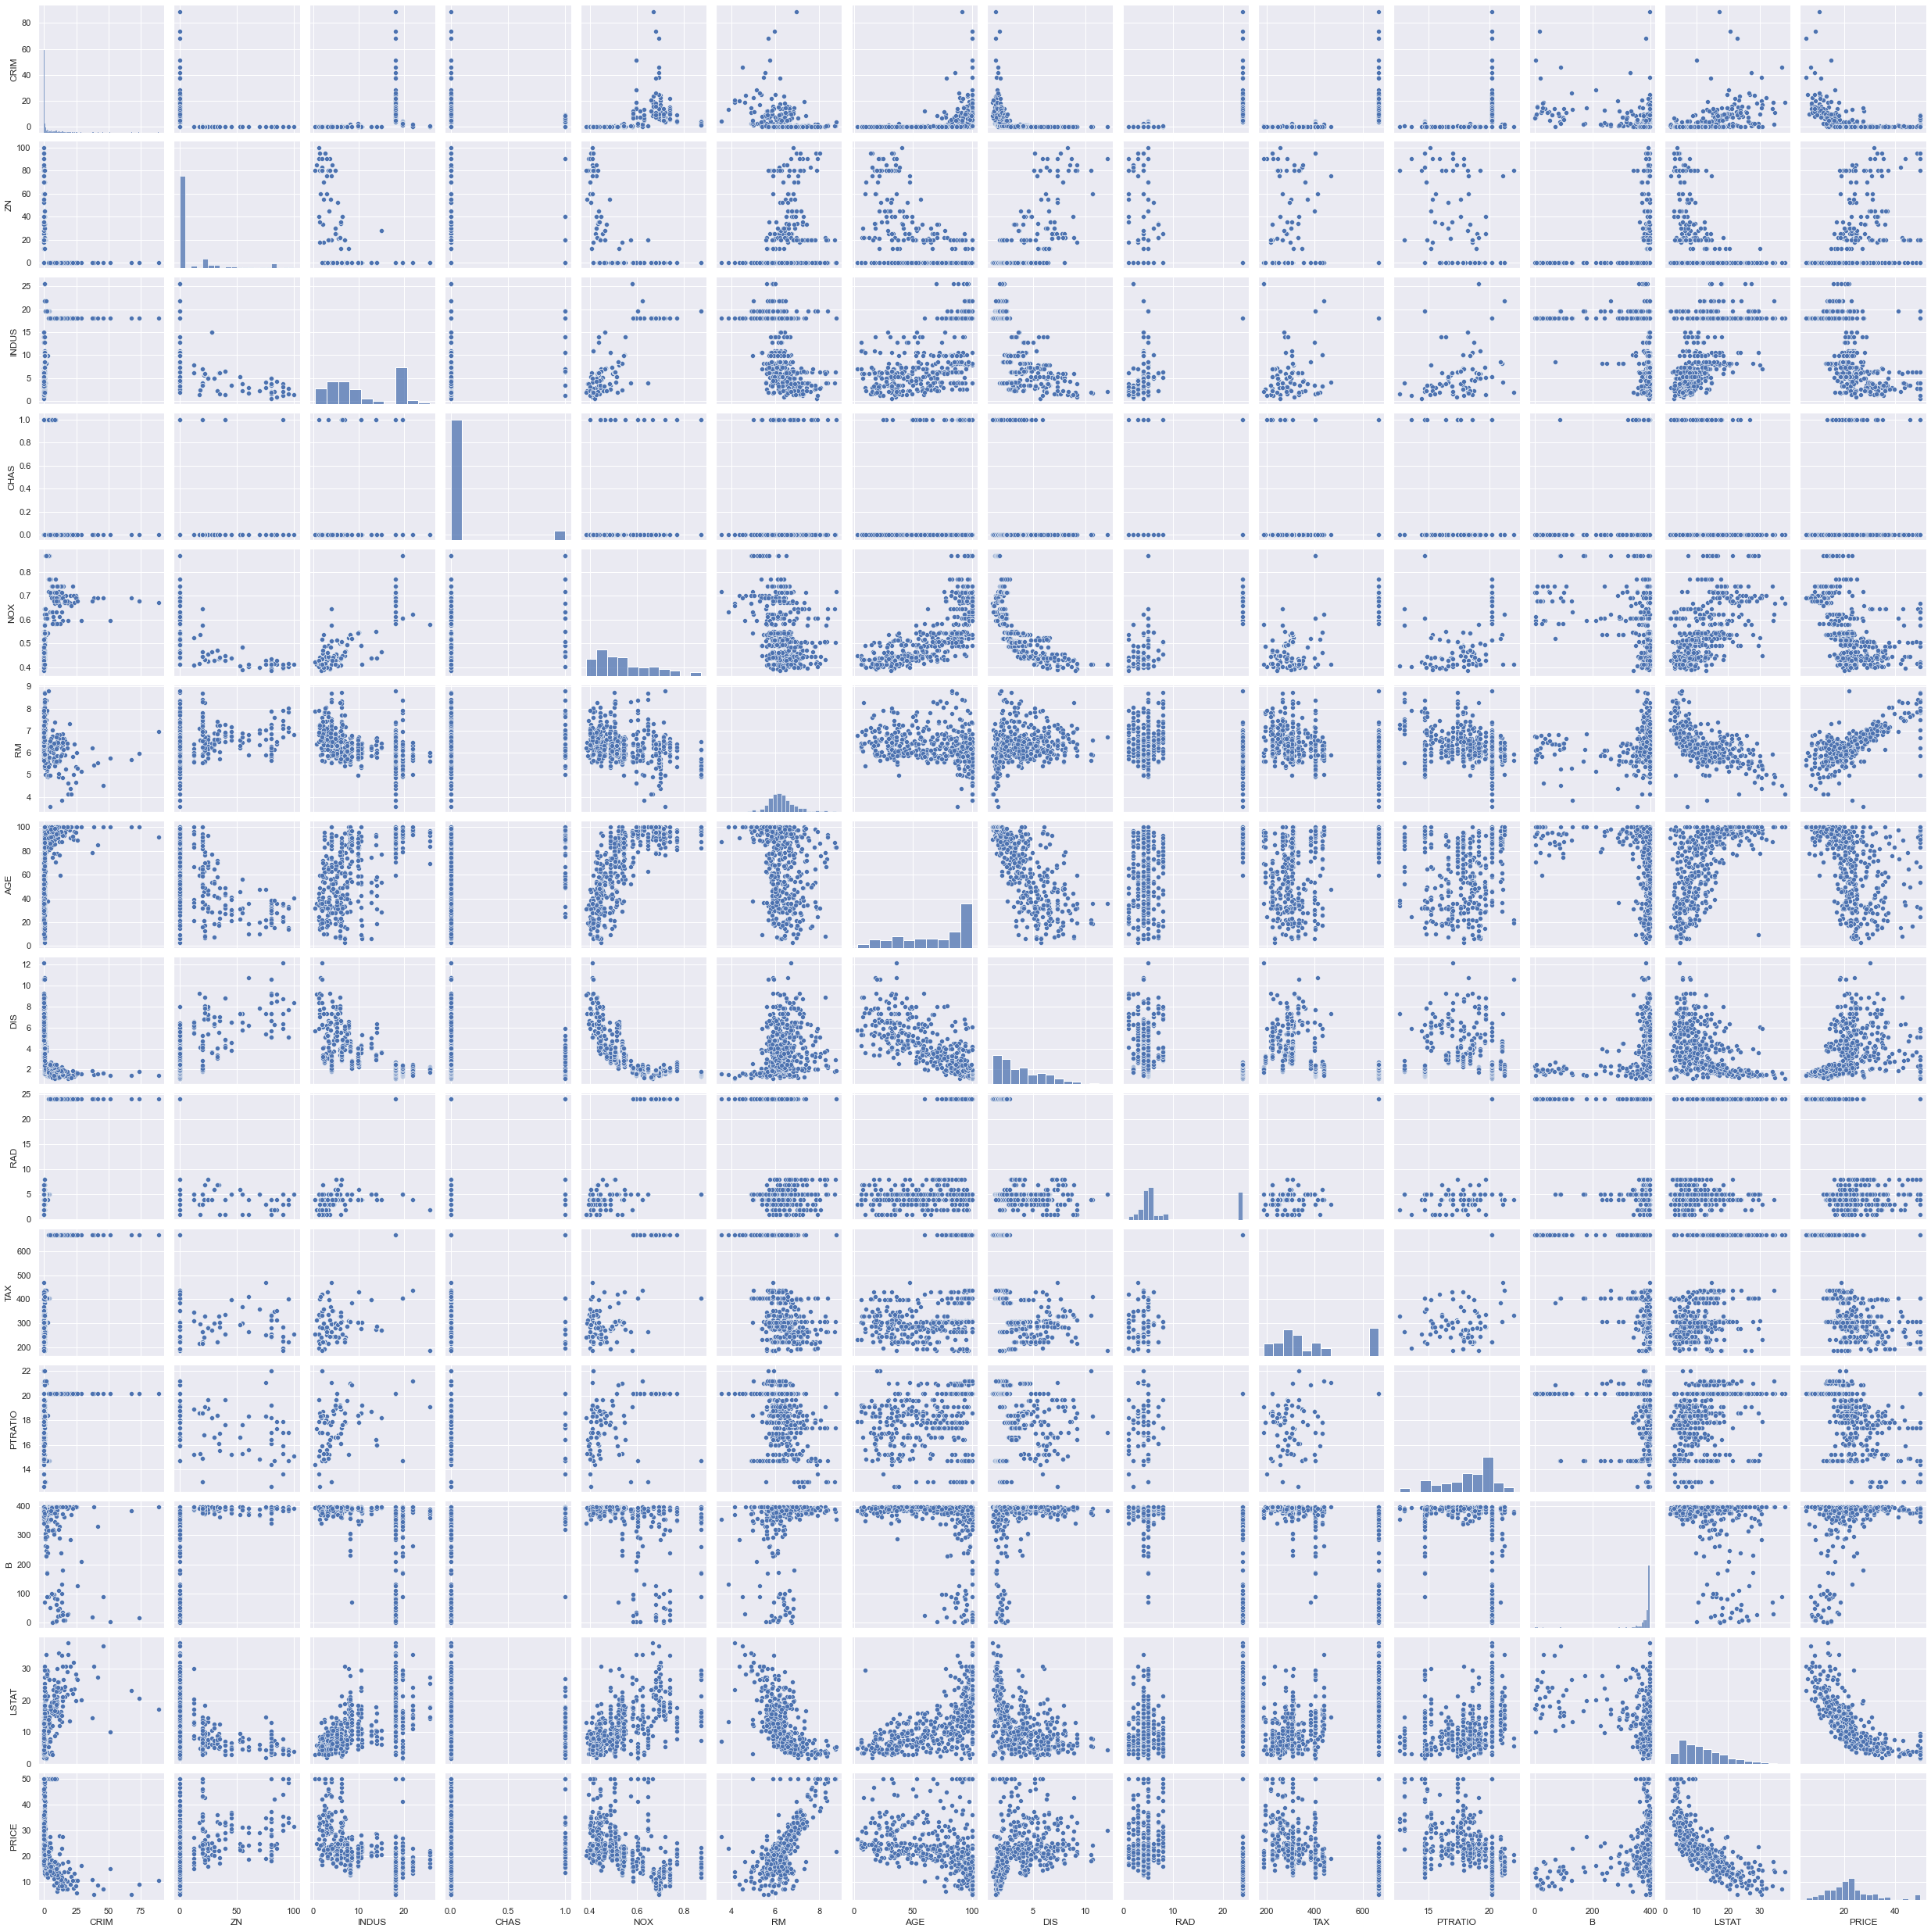

C:\Users\Sou\AppData\Local\Temp/ipykernel_16576/860978722.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


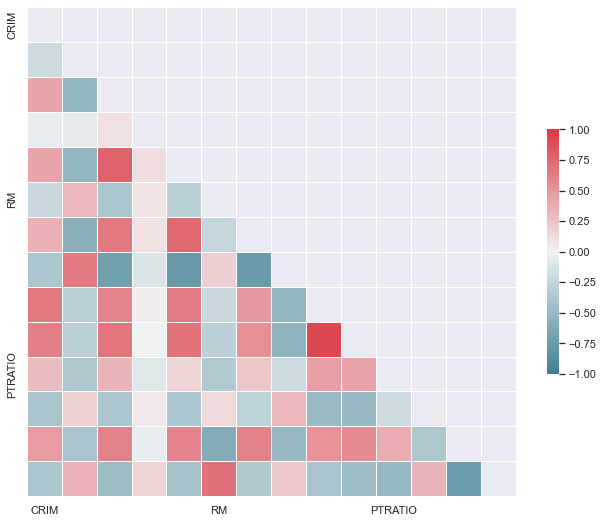

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.201641,0.426959,-0.054621,0.427183,-0.226349,0.358362,-0.388714,0.655841,0.624678,0.295820,-0.403547,0.465818,-0.396433
ZN,-0.201641,1.000000,-0.530081,-0.058275,-0.509936,0.307652,-0.574862,0.656791,-0.302446,-0.291783,-0.368321,0.187338,-0.413668,0.350377
INDUS,0.426959,-0.530081,1.000000,0.095884,0.783054,-0.392999,0.658214,-0.715923,0.594146,0.683582,0.340204,-0.391956,0.613448,-0.472678
CHAS,-0.054621,-0.058275,0.095884,1.000000,0.107758,0.084860,0.098057,-0.117726,0.019754,-0.004281,-0.102646,0.051499,-0.046267,0.167203
NOX,0.427183,-0.509936,0.783054,0.107758,1.000000,-0.302006,0.742765,-0.771461,0.634238,0.688413,0.159053,-0.384795,0.597632,-0.417873
RM,-0.226349,0.307652,-0.392999,0.084860,-0.302006,1.000000,-0.245858,0.193054,-0.226407,-0.290413,-0.357522,0.131645,-0.608247,0.696550
AGE,0.358362,-0.574862,0.658214,0.098057,0.742765,-0.245858,1.000000,-0.753438,0.490528,0.526006,0.246659,-0.282233,0.608237,-0.363250
DIS,-0.388714,0.656791,-0.715923,-0.117726,-0.771461,0.193054,-0.753438,1.000000,-0.523747,-0.542336,-0.198476,0.312300,-0.495216,0.229828
RAD,0.655841,-0.302446,0.594146,0.019754,0.634238,-0.226407,0.490528,-0.523747,1.000000,0.926707,0.453114,-0.489150,0.522181,-0.398958
TAX,0.624678,-0.291783,0.683582,-0.004281,0.688413,-0.290413,0.526006,-0.542336,0.926707,1.000000,0.428780,-0.495430,0.556795,-0.469651


In [68]:
import seaborn as sns
sns.pairplot(bos)
plt.show()

sns.set(style="darkgrid")

corr = bos.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr